# Census - demo ScanPy rank_gene_groups

_Goal_: demonstrate a simple student's t-test between two medium-size (i.e., all of the extracted data fits into memory) "obs" metadata queries/slices, using [scanpy.tl.rank_gene_groups](https://scanpy.readthedocs.io/en/stable/generated/scanpy.tl.rank_genes_groups.html#scanpy-tl-rank-genes-groups).

**NOTE:** all examples in this notebook assume that sufficient memory exists on the host machine to store query results. There are other notebooks which provide examples for out-of-core processing.

In [1]:
import cellxgene_census
import tiledbsoma as soma

As a first step, query and read a slice of data into an AnnData. In this example, lung cells (UBERON:0002048) labelled as fibroblast (CL:0000057) and natural killer cells (CL:0000623) are selected.

In [2]:
with cellxgene_census.open_soma(census_version="latest") as census:
    human = census["census_data"]["homo_sapiens"]
    with human.axis_query(
        "RNA",
        obs_query=soma.AxisQuery(
            value_filter="tissue_ontology_term_id == 'UBERON:0002048' and cell_type_ontology_term_id in ['CL:0000057', 'CL:0000623']"
        ),
    ) as query:
        adata = query.to_anndata(
            X_name="raw",
            column_names={
                "obs": [
                    "cell_type_ontology_term_id",
                    "tissue_ontology_term_id",
                ],
                "var": None,
            },
        )

adata

AnnData object with n_obs × n_vars = 216405 × 60664
    obs: 'cell_type_ontology_term_id', 'tissue_ontology_term_id'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_length'

With the data read into an AnnData, use the ScanPy API to compute the rank genes groups.

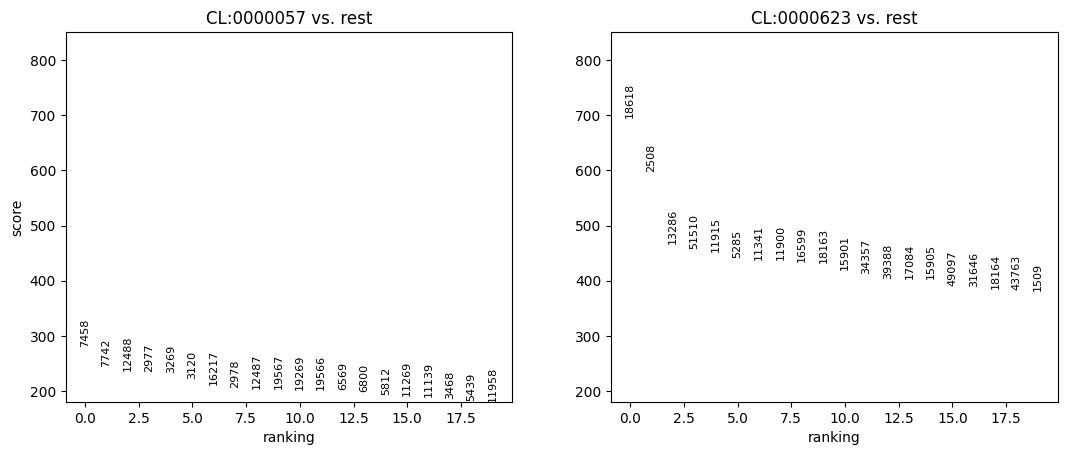

In [3]:
import scanpy

# ScanPy `rank_genes_groups` assumes that the X data is logged.
scanpy.pp.log1p(adata.X, copy=False)

# do ranking
scanpy.tl.rank_genes_groups(adata, "cell_type_ontology_term_id", method="t-test")

# visualize ranking
scanpy.pl.rank_genes_groups(adata)